<h2 align="center">Spacy Tokenization Tutorial</h2>

In [5]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [6]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#get token from doc object
#using index get particular token
#listout directory name
#check type of nlp,token

https://www.debug.school/rakeshdevcotocus_468/how-to-extract-information-using-nlp-spacy-library-2606

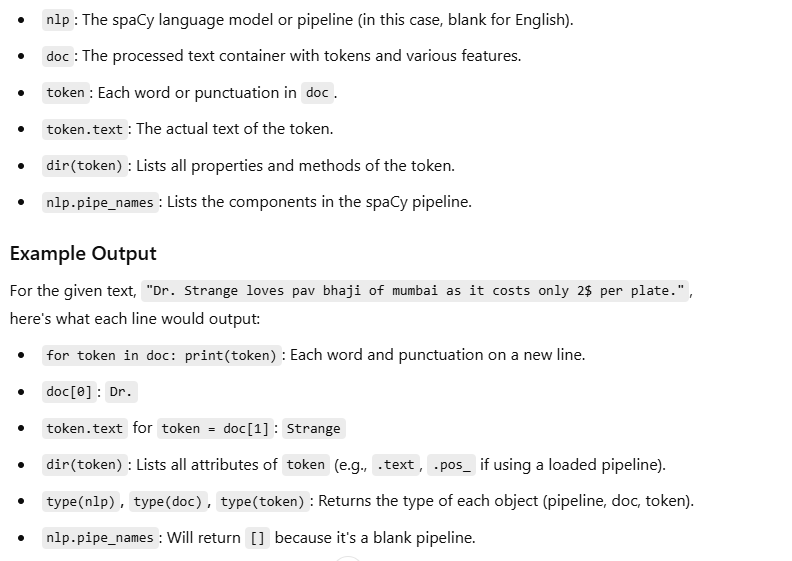

In [8]:
import spacy

Create blank language object and tokenize words in a sentence

In [9]:
nlp = spacy.blank("en")

doc = nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate.")

for token in doc:
    print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate
.


Creating blank language object gives a tokenizer and an empty pipeline. We will look more into language pipelines in next tutorial

<img src="spacy_blank_pipeline.jpg" height=100, width=500/>

<h3>Using index to grab tokens</h3>

In [10]:
doc[0]

Dr.

In [11]:
token = doc[1]
token.text

'Strange'

In [12]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang

In [13]:
type(nlp)

spacy.lang.en.English

In [14]:
type(doc)

spacy.tokens.doc.Doc

In [15]:
type(token)

spacy.tokens.token.Token

In [16]:
nlp.pipe_names

[]

<h3>Span object</h3>

In [17]:
span = doc[0:5]
span

Dr. Strange loves pav bhaji

In [18]:
type(span)

spacy.tokens.span.Span

<h3>Token attributes</h3>

In [19]:
doc = nlp("Tony gave two $ to Peter.")

In [20]:
token0 = doc[0]
token0

Tony

In [21]:
token0.is_alpha

True

In [22]:
token0.like_num

False

In [23]:
token2 = doc[2]
token2

two

In [24]:
token2.like_num

True

In [25]:
token3 = doc[3]
token3

$

In [26]:
token3.like_num

False

In [27]:
token3.is_currency

True

In [28]:
for token in doc:
    print(token, "==>", "index: ", token.i, "is_alpha:", token.is_alpha, 
          "is_punct:", token.is_punct, 
          "like_num:", token.like_num,
          "is_currency:", token.is_currency,
         )

Tony ==> index:  0 is_alpha: True is_punct: False like_num: False is_currency: False
gave ==> index:  1 is_alpha: True is_punct: False like_num: False is_currency: False
two ==> index:  2 is_alpha: True is_punct: False like_num: True is_currency: False
$ ==> index:  3 is_alpha: False is_punct: False like_num: False is_currency: True
to ==> index:  4 is_alpha: True is_punct: False like_num: False is_currency: False
Peter ==> index:  5 is_alpha: True is_punct: False like_num: False is_currency: False
. ==> index:  6 is_alpha: False is_punct: True like_num: False is_currency: False


<h3>Collecting email ids of students from students information sheet</h3>

In [29]:
with open("students.txt") as f:
    text = f.readlines()
text

FileNotFoundError: [Errno 2] No such file or directory: 'students.txt'

In [ ]:
text = " ".join(text)
text

In [ ]:
doc = nlp(text)
emails = []
for token in doc:
    if token.like_email:
        emails.append(token.text)
emails        

<h3>Support in other languages</h3>

Spacy support many language models. Some of them do not support pipelines though!
https://spacy.io/usage/models#languages

In [ ]:
nlp = spacy.blank("hi")
doc = nlp("भैया जी! 5000 ₹ उधार थे वो वापस देदो")
for token in doc:
    print(token, token.is_currency)

<h3>Customizing tokenizer</h3>

In [ ]:
from spacy.symbols import ORTH

nlp = spacy.blank("en")
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

In [ ]:
nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "gim"},
    {ORTH: "me"},
])
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

<h3>Sentence Tokenization or Segmentation</h3>

In [ ]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

In [ ]:
nlp.pipeline

In [ ]:
nlp.add_pipe('sentencizer')

In [ ]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

In [ ]:
nlp.pipeline

<h3>Exercise</h3>

(1) Think stats is a free book to study statistics (https://greenteapress.com/thinkstats2/thinkstats2.pdf) 

This book has references to many websites from where you can download free datasets. You are an NLP engineer working for some company and you want to collect all dataset websites from this book. To keep exercise simple you are given a paragraph from this book and you want to grab all urls from this paragraph using spacy

In [ ]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

# TODO: Write code here
# Hint: token has an attribute that can be used to detect a url

(2) Extract all money transaction from below sentence along with currency. Output should be,

two $

500 €

In [ ]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

# TODO: Write code here
# Hint: Use token.i for the index of a token and token.is_currency for currency symbol detection

[Click me to see a solution](https://github.com/codebasics/nlp-tutorials/blob/main/4_tokenization/spacy_tokenizer_exercise_solution.ipynb)

<h3>Further Reading</h3>

https://spacy.io/usage/linguistic-features#tokenization